In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install tensorflow_gpu


In [9]:
import cv2
import os
import tensorflow as tf
data_gen=tf.keras.preprocessing.image.ImageDataGenerator( 
                                                                                                    rotation_range=0.2, 
                                                                                                    width_shift_range=0.2, height_shift_range=0.2,
                                                                                                    shear_range=0.2, zoom_range=0.2, channel_shift_range=0.2, fill_mode='nearest', 
                                                                                                    horizontal_flip=True, vertical_flip=True,
                                                                                                    validation_split=0.15)

data=data_gen .flow_from_directory( directory="/content/drive/My Drive/vort", target_size=(256, 256), color_mode='rgb', classes=["gates","not gates"], class_mode='binary', shuffle=True ,  )
 

Found 501 images belonging to 2 classes.


In [47]:
image[0]

array([[[ 36.21257 , 100.21257 , 102.21257 ],
        [ 35.970604, 100.460075, 102.460075],
        [ 35.296978, 101.339264, 102.296974],
        ...,
        [ 17.949547,  51.949547,  60.949547],
        [ 17.949547,  51.949547,  60.949547],
        [ 17.949547,  51.949547,  60.949547]],

       [[ 36.21874 , 100.21874 , 102.21874 ],
        [ 35.964436, 100.45699 , 102.45699 ],
        [ 35.30006 , 101.35161 , 102.300064],
        ...,
        [ 17.949547,  51.949547,  60.949547],
        [ 17.949547,  51.949547,  60.949547],
        [ 17.949547,  51.949547,  60.949547]],

       [[ 36.22491 , 100.22491 , 102.22491 ],
        [ 35.958267, 100.4539  , 102.4539  ],
        [ 35.303146, 101.363945, 102.30315 ],
        ...,
        [ 17.949547,  51.949547,  60.949547],
        [ 17.949547,  51.949547,  60.949547],
        [ 17.949547,  51.949547,  60.949547]],

       ...,

       [[ 64.62696 , 138.03712 , 147.25694 ],
        [ 65.26986 , 139.2178  , 148.34323 ],
        [ 64.78369 , 1

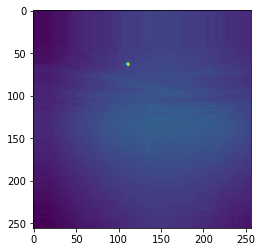

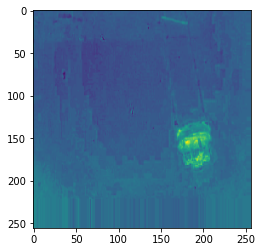

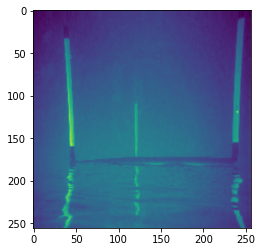

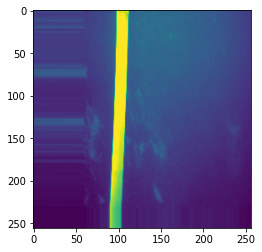

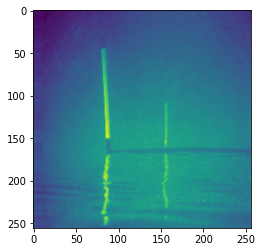

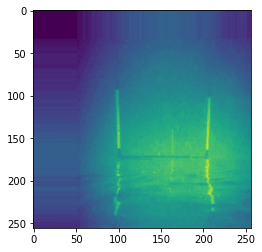

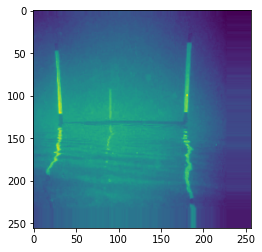

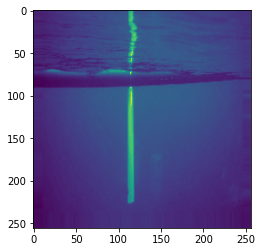

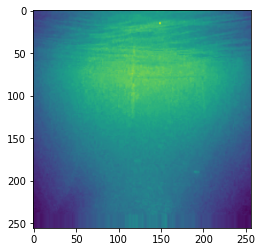

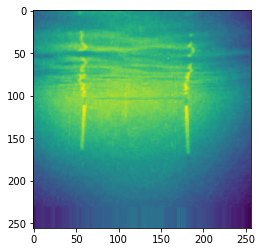

In [58]:
import matplotlib.pyplot as plt
# printing 10 images from the generator
for i in range (10):
  image = next(data)[0] # taking only the images without the labels
      # plot image
  plt.imshow( image[i, : , : , 0 ] )
  plt.show()


In [12]:
t1,t2= next(data)

In [13]:
t1.shape # training images

(32, 256, 256, 3)

In [15]:
t2 #  labels 

array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
      dtype=float32)

In [7]:
next(data)[0].shape

(32, 256, 256, 3)

In [60]:

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout( 0.3) )
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout( 0.4) )
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [61]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [17]:
cnn.fit( data , epochs=10,verbose=1)

Epoch 1/5
16/16 [==============================] - 278s 17s/step - loss: 666.1406 - accuracy: 0.7186
Epoch 2/5
16/16 [==============================] - 14s 906ms/step - loss: 3.7082 - accuracy: 0.8982
Epoch 3/5
16/16 [==============================] - 14s 898ms/step - loss: 0.3048 - accuracy: 0.8603
Epoch 4/5
16/16 [==============================] - 14s 898ms/step - loss: 0.2224 - accuracy: 0.9361
Epoch 5/5
16/16 [==============================] - 14s 900ms/step - loss: 0.1906 - accuracy: 0.9421
